# Matplotlib

In [ ]:
import pandas as pd
pd.set_option('display.max_rows', 20)

df = pd.read_csv("data/cars.csv", parse_dates=['offer_timestamp'])
df.head()

## Podstawowe typy wykresów

### Wykres liniowy (*line plot*)

**Kiedy używamy:**
- mamy dwie zmienne o rozkładzie ciągłym
- istnieje między nimi zależność
- powinien istnieć określony porządek wartości dla zmiennej niezależnej

---
**Zadanie:**

Zwizualizuj średnią cenę samochodów wyprodukowanych w latach 1990-2021

In [ ]:
price_per_year = df[df["prod_year"]>=1990].groupby("prod_year")["price"].mean()
price_per_year

In [ ]:
import matplotlib.pyplot as plt

plt.plot(price_per_year.index, price_per_year.values)  #;

In [ ]:
plt.plot(df["mileage"], df["engine_vol"]);

In [ ]:
plt.plot([1, 2, 3, 4], [12, 15, 10, 11]);

In [ ]:
plt.plot([1, 2, 3, 4], [12, 15, 10, 11])
plt.plot([1, 2, 3, 4], [8, 5, 11, 10]);

In [ ]:
plt.plot([12, 15, 10, 11]);

# plt.show()

> ZADANIA

### Wykres punktowy (*scatter plot*)

**Kiedy używamy:**
- mamy dwie zmienne z czego przynajmniej jedna (niezależna) ma rozkład dyskretny ALBO mamy dwie zmienne o rozkładzie ciągłym oraz dane pomiarowe konkretnych obserwacji
- istnieje między nimi zależność

---
**Zadanie:**

Sprawdź czy istnieje zależność liniowa między mocą samochodu a jego ceną.

In [ ]:
df.head()

In [ ]:
plt.scatter(df["power"], df["price"]);

W danych występują outliery. Warto się ich najpierw pozbyć.

In [ ]:
df = df[(df["power"] < 600) & (df["price"] < 1e5)]

In [ ]:
plt.scatter(df["power"], df["price"]);

In [ ]:
plt.scatter(df["power"][::1000], df["price"][::1000]);

In [ ]:
plt.scatter([1, 2, 3, 4], [12, 15, 10, 11]);

> ZADANIA

### Histogram (*histogram*)

**Kiedy używamy:**
- mamy wiele obserwacji zmiennej numerycznej, której rozkład chcemy zwizualizować

---
**Zadanie:**

Zwizualizuj rozkład zmiennej `mileage` zawierającej informacje o przebiegu samochodów.

In [ ]:
df = df[df["mileage"]<0.5e6]

plt.hist(df["mileage"]);

Wykres jest mało czytelny, dodajmy krawędzie.

In [ ]:
plt.hist(df["mileage"], edgecolor='black');

Możemy również zdefiniować przedziały słupków. Albo określimy ich liczbę, albo granice przedziałów.

In [ ]:
plt.hist(df["mileage"], edgecolor='black', bins=20);

In [ ]:
plt.hist(df["mileage"], bins=range(1000, 500000, 1000));

In [ ]:
plt.hist(df[(df["mileage"]>0.8e5) & (df["mileage"]<1.8e5)]["mileage"], edgecolor='black', bins=range(80000, 180000, 1000));

In [ ]:
plt.hist(df[(df["mileage"]>1.8e5) & (df["mileage"]<2.2e5)]["mileage"], edgecolor='black', bins=range(180000, 220000, 1000));

In [ ]:
n, bins, _ = plt.hist(
    df[(df["mileage"]>1.8e5) & (df["mileage"]<2.2e5)]["mileage"], edgecolor='black', bins=range(180000, 220000, 1000));

In [ ]:
n

In [ ]:
bins

In [ ]:
n.argmax()

In [ ]:
bins[n.argmax()]

> ZADANIA

### Wykres słupkowy (*bar plot*)

**Kiedy używamy:**
- chcemy zwizualizować relację między jedną zmienną kategoryczną i jedną zmienną ciągłą
- dla każdej unikalnej wartości pierwszej zmiennej przedstawiamy odpowiadającą jej wartość drugiej zmiennej

---
**Zadanie:**

Zwizualizuj średnią cenę samochodów marek: Fiat, Volkswagen, Mercedes-Benz.

In [ ]:
brands_prices = df.groupby("brand").mean(numeric_only=True)["price"].loc[["Fiat", "Volkswagen", "Mercedes-Benz"]]
brands_prices

In [ ]:
plt.bar(brands_prices.index, brands_prices.values);

In [ ]:
plt.bar(["a", "b", "c"], [3, 6, -2]);

> ZADANIA

### Wykres kołowy (*pie plot*)

**Kiedy używamy:**
- przedstawiamy na jakie części i w jakich proporcjach dzieli się pewna całość

---
**Zadanie:**

Przedstaw na wykresie procentowy udział poszczególnych marek w całości danych. Powinno znajdować się tam 8 najpopularniejszych marek a reszta niech trafi do zbiorczej kategorii "Inne"

In [ ]:
value_counts = df["brand"].value_counts(normalize=True).iloc[:8]
value_counts

In [ ]:
values = list(value_counts.values) + [(1 - value_counts.sum())]
labels = list(value_counts.index) + ["Inne"]

In [ ]:
plt.pie(values, labels=labels, autopct='%.2f');

In [ ]:
plt.pie([1, 2, 3], labels=["a", "b", "c"]);

### Heatmapa (*heatmap*)

**Kiedy używamy:**
- mamy dwie zmienne kategoryczne/numeryczne, które tworzą przestrzeń dwuwymiarową
- dla każdego punktu w tej przestrzeni pewna zmienna numeryczna ma określoną wartość

Często ten typ wykresu obrazuje rozkład temperatury na jakiejś powierzchni

---
**Zadanie:**

Przedstaw na heatmapie liczbę wystawionych ofert sprzedaży samochodów o poszczególnych kształtach nadwozia w poszczególnych latach 

In [ ]:
df2 = df[df["prod_year"]>2012]

In [ ]:
outside = np.repeat(sorted(df2["body"].unique()), df2["prod_year"].nunique())
inside = sorted(df2["prod_year"].unique()) * df2["body"].nunique()
zipped_index = zip(outside, inside)
hier_index = pd.MultiIndex.from_tuples(zipped_index)

In [ ]:
grouped_df = df2.groupby(["body", "prod_year"]).count()["price"].reindex(hier_index, fill_value=0)
grouped_df

In [ ]:
values_matrix = grouped_df.values.reshape(df2["body"].nunique(), df2["prod_year"].nunique())
values_matrix

In [ ]:
sorted(df2["body"].unique())

In [ ]:
sorted(df2["prod_year"].unique())

In [ ]:
plt.imshow(values_matrix);

In [ ]:
plt.imshow(np.arange(10000).reshape(100, 100));

## Stylowanie wykresu

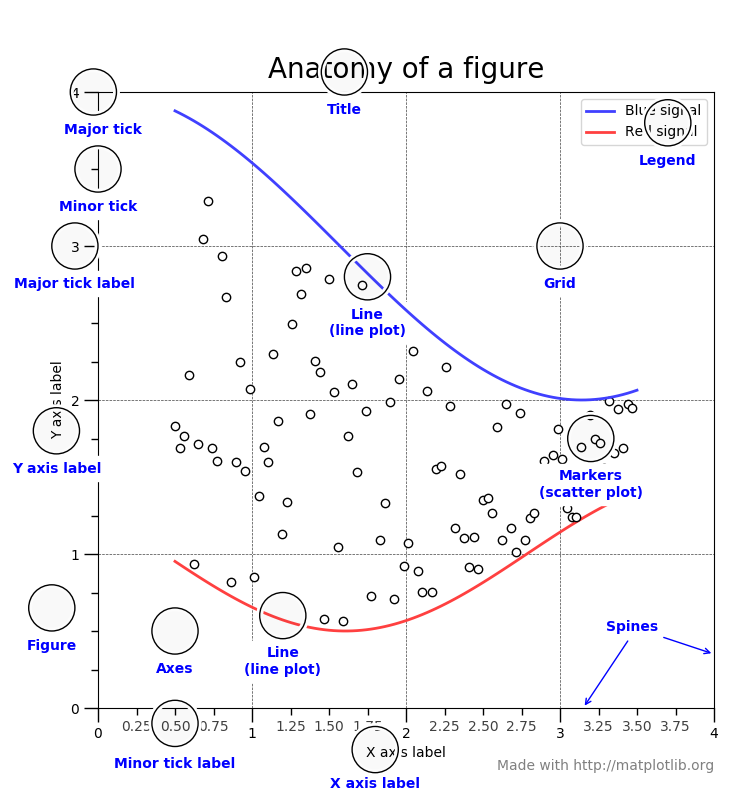

### Kolory

In [ ]:
x = np.arange(100) + 5*np.random.randn(100)
y = 10 + 0.6*np.arange(100) + 5*np.random.randn(100)

plt.plot(x);
plt.plot(y);

In [ ]:
plt.plot(x, color='r');
plt.plot(y, color='#14f4ac');
plt.plot(1.5*y, c='blue');
plt.plot(1.5*x, c='k');

### Markery i styl linii

In [ ]:
plt.scatter(x, y);

In [ ]:
plt.scatter(x, y, marker='.');  # x, ^, v, *, ... -> https://matplotlib.org/stable/api/markers_api.html

In [ ]:
plt.plot(y, '--');  # .-, *-, o, ., ... -> https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

In [ ]:
plt.plot(y, 'g.-');

### Opisy osi i tytuł wykresu

In [ ]:
plt.plot(x);

plt.xlabel("Oś x");
plt.ylabel("Oś y");
plt.title("Tytuł wykresu");

In [ ]:
plt.plot(x);

plt.xlabel("Oś x", fontsize=14);
plt.ylabel("Oś y", fontsize=14);
plt.title("Tytuł wykresu ~ $\lambda \phi \cdot \epsilon$", fontsize=16);

### Granice

In [ ]:
plt.plot(x);

plt.xlim([20, 50]);
plt.ylim(10, 60);

> ZADANIA

### Ticki

In [ ]:
plt.plot(x);

In [ ]:
plt.plot(x);
plt.xticks([10, 30, 60]);

In [ ]:
plt.plot(x);
plt.xticks([10, 30, 60], ["a", "b", "c"]);
plt.yticks([50, 60], ["a1", "b1"]);

### Legenda

In [ ]:
plt.plot(x, label='x');
plt.plot(y, label='y');
plt.plot(1.5*y, label='$1.5\cdot y$');
plt.plot(1.5*x, label='$1.5\cdot x$');

plt.legend();

In [ ]:
plt.plot(x, label='x');
plt.plot(y, label='y');
plt.plot(1.5*y, label='$1.5\cdot y$');
plt.plot(1.5*x, label='$1.5\cdot x$');

plt.legend(loc=1);  # 2, 3, ... -> https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html

### Siatka

In [ ]:
plt.plot(x);
plt.plot(y);
plt.plot(1.5*y);
plt.plot(1.5*x);

plt.grid();  # axis='x', 'y'

### Zmiana rozmiaru

In [ ]:
plt.figure(figsize=(5, 3))

plt.plot(x);

In [ ]:
plt.figure(figsize=(5, 7))

plt.plot(y);

In [ ]:
plt.figure(figsize=(5, 7))
plt.plot(y);

# plt.figure(figsize=(3, 2))
plt.plot(x);

> ZADANIA

### Subploty

In [ ]:
fig, ax = plt.subplots()

ax.plot(x);

In [ ]:
ax

In [ ]:
fig

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8))  # , sharex=True, sharey=True

ax[0, 0].plot(x);
ax[0, 1].plot(y);
ax[1, 0].plot(2*x);
ax[1, 1].plot(2*y);

plt.subplots_adjust(left=0.1, bottom=0.05, right=0.9, top=0.8, wspace=0.25, hspace=0.35)

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8))

ax[0, 0].plot(x);
ax[0, 1].plot(y);
ax[1, 0].plot(2*x);
ax[1, 1].plot(2*y);

ax[0, 0].set_title("Wykres x");
ax[0, 1].set_title("Wykres y");
ax[1, 0].set_title("Wykres 2*x");
ax[1, 1].set_title("Wykres 2*y");

fig.suptitle("Tytuł całego wykresu");

ax[1, 1].set_xticks([20, 50, 80], ["a", "b", "c"]);

In [ ]:
ax

In [ ]:
fig

> ZADANIA

### Colorbar i colormap

In [ ]:
plt.imshow(np.arange(10000).reshape(100, 100));  # , cmap='jet'

plt.colorbar();

### Zaawansowane stylowanie ticków

In [ ]:
fig, ax = plt.subplots()

ax.plot(x, '--')

ax.set_title("Tytuł")
ax.set_xlabel('Oś x')
ax.set_ylabel('Oś y')

ax.tick_params(axis='both', which='both', direction='in', labelsize=14)  # axis: x, y, both  which: major, minor, both
ax.minorticks_on()

In [ ]:
plt.plot(x)

plt.xticks(rotation=45, fontsize=20);

### Dwie osie pionowe

In [ ]:
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

In [ ]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color='red')
ax1.plot(t, data1, color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()

ax2.set_ylabel('sin', color='blue')
ax2.plot(t, data2, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

ax1.set_xticks([2, 4, 6, 8]);  # ax2

## Wykresy 3D

In [ ]:
%matplotlib notebook

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)

a = 2
b = 3
Z = a*X + b*Y

ax.set_xlabel("$X_1$")
ax.set_ylabel("$X_2$")
ax.set_zlabel("$Y$")

ax.plot_surface(X, Y, Z, cmap='jet', alpha=.3)

np.random.seed(0)
x = np.random.uniform(-4, 4, size=16)
y = np.random.uniform(-4, 4, size=16)
z = a*x+b*y + 6*np.random.normal(size=16)

ax.scatter(x, y, z);

ax.scatter([0], [0], [0], 'r')

plt.show()

## Pozostałe informacje
### Zapis do pliku

In [ ]:
fig

In [ ]:
fig.savefig("fig.png")

In [ ]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color='red')
ax1.plot(t, data1, color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()

ax2.set_ylabel('sin', color='blue')
ax2.plot(t, data2, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

ax1.set_xticks([2, 4, 6, 8]);  # ax2

# ---

fig.savefig('2axis.png')

In [ ]:
# %matplotlib inline

plt.plot([1, 2, 3])

# plt.show()

### Wykres zmienny w czasie

In [ ]:
from IPython.display import clear_output


map_ = np.zeros([100, 100])

for i in range(10):
    x = np.random.randint(10, 90)
    y = np.random.randint(10, 90)
    map_[y-1:y+1, x-1:x+1] = 1

    plt.imshow(map_, cmap="nipy_spectral")
    plt.title("Time step: " + str(i))
    plt.show(block=False)

    plt.pause(0.5);
    plt.clf();
    
    clear_output()

In [ ]:
%%writefile animation.py
import numpy as np
import matplotlib.pyplot as plt


map_ = np.zeros([100, 100])

for i in range(10):
    x = np.random.randint(10, 90)
    y = np.random.randint(10, 90)
    map_[y-1:y+1, x-1:x+1] = 1

    plt.imshow(map_, cmap="nipy_spectral")
    plt.title("Time step: " + str(i))
    plt.show(block=False)

    plt.pause(0.5);
    plt.clf();

### `rcParams`

runtime configuration parameters

In [ ]:
plt.rcParams

In [ ]:
plt.plot(np.random.rand(100));

In [ ]:
plt.rcParams['figure.figsize'] = (12, 6)

In [ ]:
plt.plot(np.random.rand(100));

In [ ]:
import matplotlib as mpl

plt.rcParams['axes.prop_cycle'] = mpl.cycler(color=["r", "k", "c"]) 

x = np.linspace(0, 20, 100)

for i in range(6):
    plt.plot(x, i * (x - 10)**2)

plt.show()